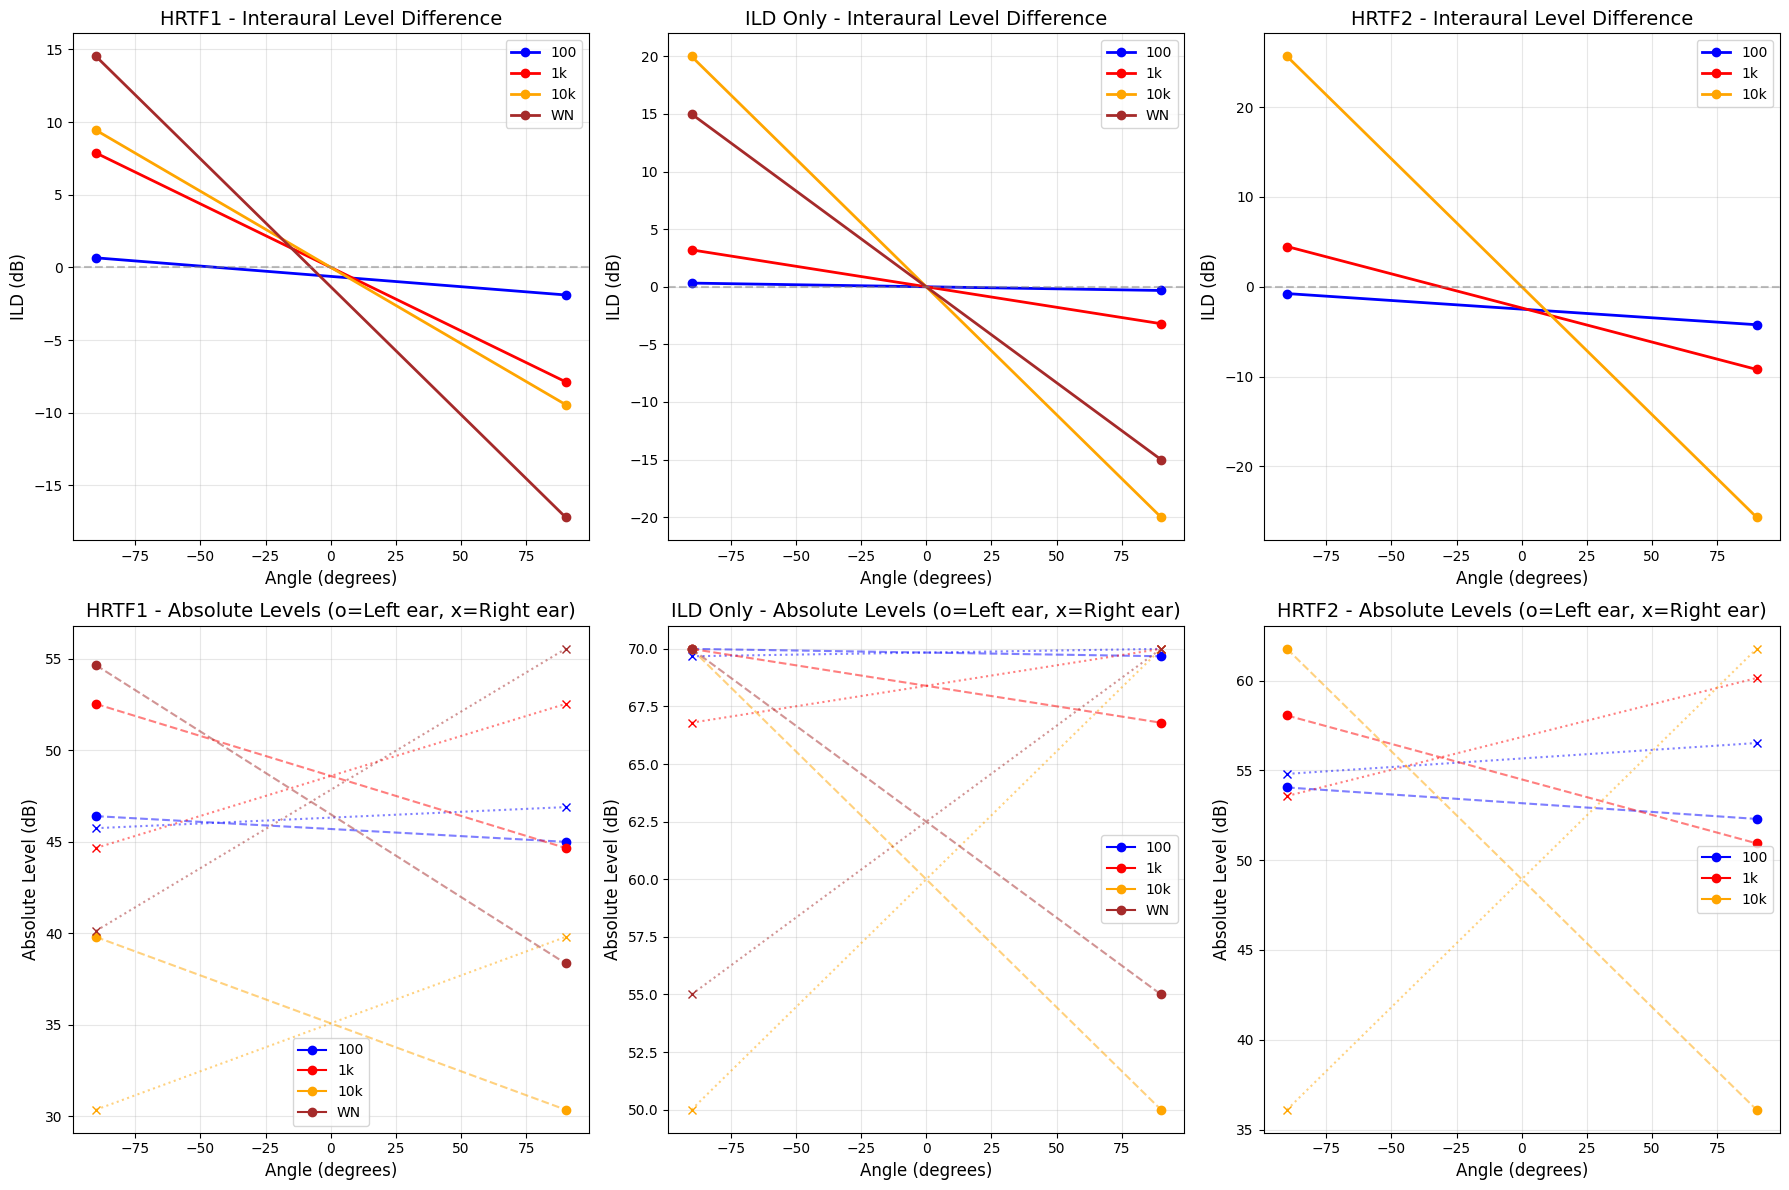

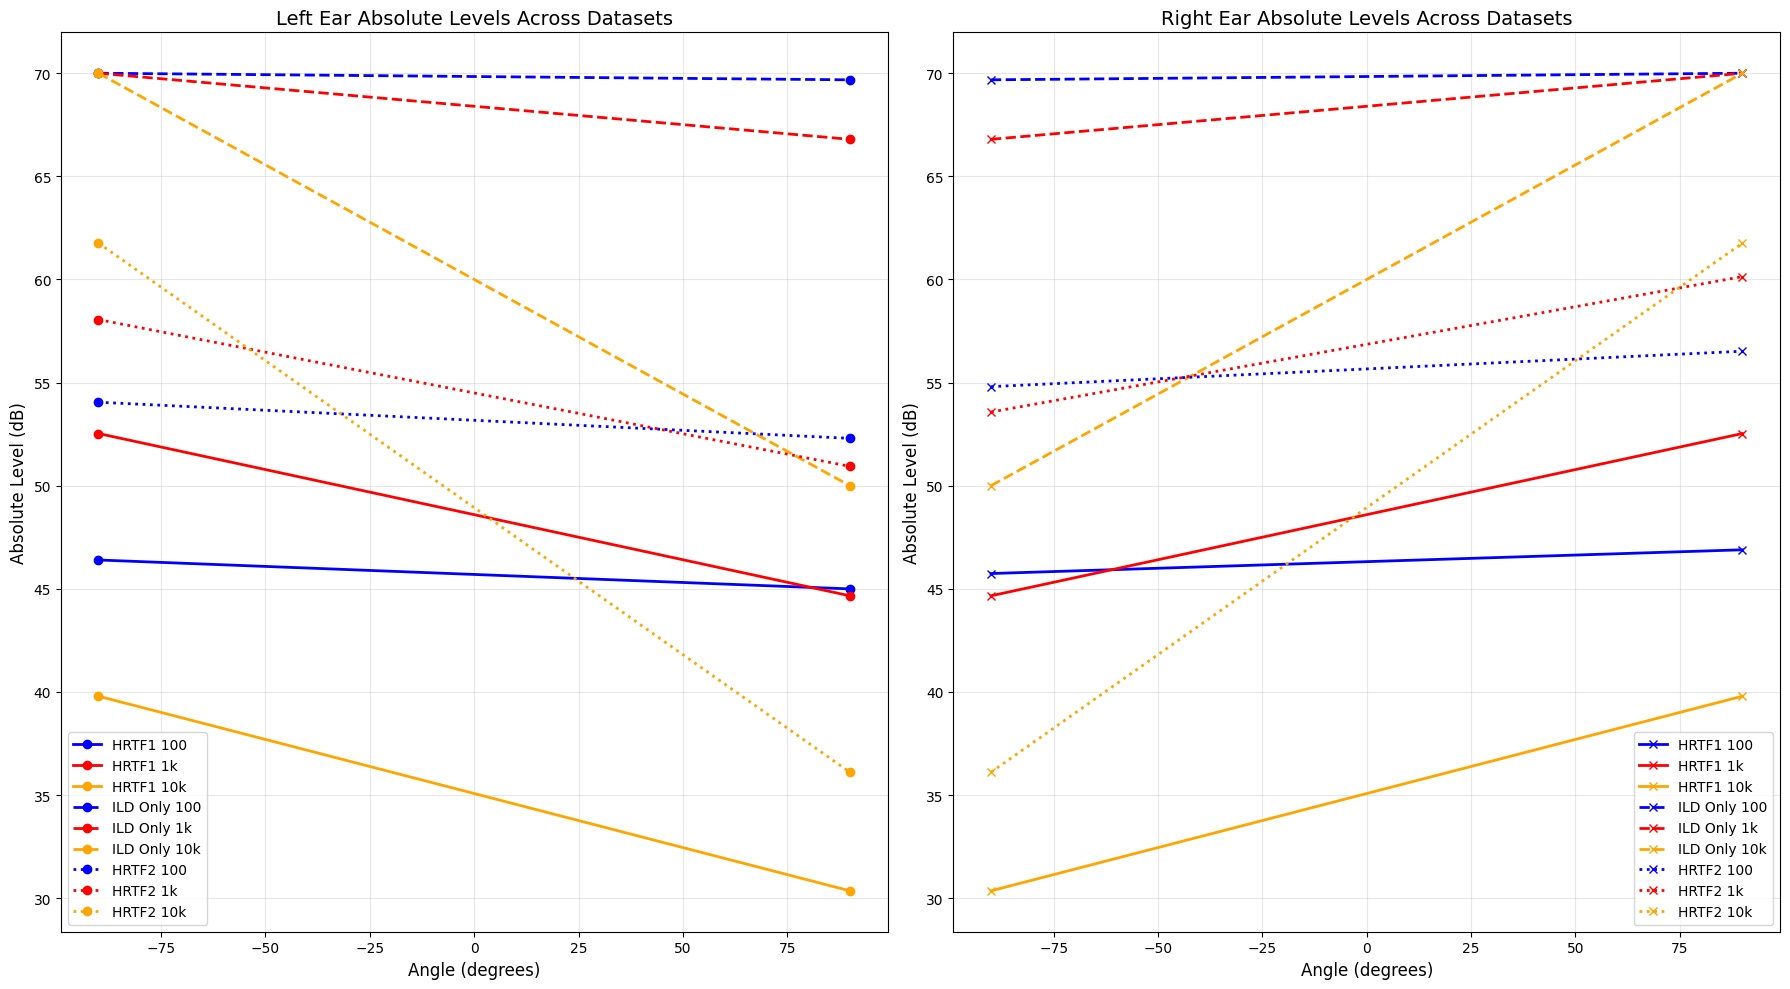

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Parse the data
hrtf1_data = {
    '100': {'neg90': [46.39873313, 45.74242648], 'pos90': [44.9967349, 46.89338925]},
    #'300': {'neg90': [47.724112, 45.02969493], 'pos90': [44.43481229, 48.02919677]},
    '1k': {'neg90': [52.53111083, 44.66162118], 'pos90': [44.66162118, 52.53111083]},
    #'1.5k': {'neg90': [49.80810543, 46.04207142], 'pos90': [43.97539607, 50.48278985]},
    '10k': {'neg90': [39.79477054, 30.35756729], 'pos90': [30.35756729, 39.79477054]},
    'WN': {'neg90': [54.64864596, 40.13124681], 'pos90': [38.35379249, 55.54145774]}
}

ild_only_data = {
    '100': {'neg90': [70, 69.67942932], 'pos90': [69.67942932, 70]},
    '1k': {'neg90': [70, 66.79429321], 'pos90': [66.79429321, 70]},
    '10k': {'neg90': [70, 50], 'pos90': [50, 70]},
    'WN': {'neg90': [70, 55], 'pos90': [55, 70]}
}

hrtf2_data = {
    '100': {'neg90': [54.04766999, 54.80358878], 'pos90': [52.29627306, 56.52128402]},
    '1k': {'neg90': [58.05531098, 53.57202068], 'pos90': [50.93790147, 60.13840471]},
    '10k': {'neg90': [61.76384279, 36.10793421], 'pos90': [36.10793421, 61.76384279]}
}

# Define a consistent color mapping for all sounds
# This ensures each sound has the same color across all plots
color_map = {
    '100': 'blue',
    '300': 'green',
    '1k': 'red',
    '1.5k': 'purple',
    '10k': 'orange',
    'WN': 'brown'
}

# Function to calculate ILD (difference between elements in each bracket)
def calculate_ild(data_point):
    return data_point[0] - data_point[1]

# Create a figure with two rows: top for ILD plots, bottom for absolute levels
plt.figure(figsize=(18, 12))

# ===== First row: ILD plots =====
# HRTF1 ILD Plot
plt.subplot(2, 3, 1)
for label, values in hrtf1_data.items():
    neg90_ild = calculate_ild(values['neg90'])
    pos90_ild = calculate_ild(values['pos90'])
    plt.plot([-90, 90], [neg90_ild, pos90_ild], marker='o', linewidth=2, 
             label=label, color=color_map.get(label, 'black'))
plt.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
plt.grid(True, alpha=0.3)
plt.xlabel('Angle (degrees)', fontsize=12)
plt.ylabel('ILD (dB)', fontsize=12)
plt.title('HRTF1 - Interaural Level Difference', fontsize=14)
plt.legend(fontsize=10)

# ILD Only Plot
plt.subplot(2, 3, 2)
for label, values in ild_only_data.items():
    neg90_ild = calculate_ild(values['neg90'])
    pos90_ild = calculate_ild(values['pos90'])
    plt.plot([-90, 90], [neg90_ild, pos90_ild], marker='o', linewidth=2, 
             label=label, color=color_map.get(label, 'black'))
plt.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
plt.grid(True, alpha=0.3)
plt.xlabel('Angle (degrees)', fontsize=12)
plt.ylabel('ILD (dB)', fontsize=12)
plt.title('ILD Only - Interaural Level Difference', fontsize=14)
plt.legend(fontsize=10)

# HRTF2 ILD Plot
plt.subplot(2, 3, 3)
for label, values in hrtf2_data.items():
    neg90_ild = calculate_ild(values['neg90'])
    pos90_ild = calculate_ild(values['pos90'])
    plt.plot([-90, 90], [neg90_ild, pos90_ild], marker='o', linewidth=2, 
             label=label, color=color_map.get(label, 'black'))
plt.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
plt.grid(True, alpha=0.3)
plt.xlabel('Angle (degrees)', fontsize=12)
plt.ylabel('ILD (dB)', fontsize=12)
plt.title('HRTF2 - Interaural Level Difference', fontsize=14)
plt.legend(fontsize=10)

# ===== Second row: Absolute level plots =====
# HRTF1 Absolute Levels
plt.subplot(2, 3, 4)
for label, values in hrtf1_data.items():
    # Left ear at -90°
    plt.plot([-90], [values['neg90'][0]], marker='o', color=color_map.get(label, 'black'), 
             label=f"{label} Left" if label not in ['100', '300', '1k', '10k', 'WN'] else label)
    # Right ear at -90°
    plt.plot([-90], [values['neg90'][1]], marker='x', color=color_map.get(label, 'black'))
    
    # Left ear at +90°
    plt.plot([90], [values['pos90'][0]], marker='o', color=color_map.get(label, 'black'))
    # Right ear at +90°
    plt.plot([90], [values['pos90'][1]], marker='x', color=color_map.get(label, 'black'))
    
    # Connect left ears
    plt.plot([-90, 90], [values['neg90'][0], values['pos90'][0]], '--', 
             color=color_map.get(label, 'black'), alpha=0.5)
    # Connect right ears
    plt.plot([-90, 90], [values['neg90'][1], values['pos90'][1]], ':', 
             color=color_map.get(label, 'black'), alpha=0.5)

plt.grid(True, alpha=0.3)
plt.xlabel('Angle (degrees)', fontsize=12)
plt.ylabel('Absolute Level (dB)', fontsize=12)
plt.title('HRTF1 - Absolute Levels (o=Left ear, x=Right ear)', fontsize=14)
plt.legend(fontsize=10)

# ILD Only Absolute Levels
plt.subplot(2, 3, 5)
for label, values in ild_only_data.items():
    # Left ear at -90°
    plt.plot([-90], [values['neg90'][0]], marker='o', color=color_map.get(label, 'black'), 
             label=f"{label} Left" if label not in ['100', '1k', '10k', 'WN'] else label)
    # Right ear at -90°
    plt.plot([-90], [values['neg90'][1]], marker='x', color=color_map.get(label, 'black'))
    
    # Left ear at +90°
    plt.plot([90], [values['pos90'][0]], marker='o', color=color_map.get(label, 'black'))
    # Right ear at +90°
    plt.plot([90], [values['pos90'][1]], marker='x', color=color_map.get(label, 'black'))
    
    # Connect left ears
    plt.plot([-90, 90], [values['neg90'][0], values['pos90'][0]], '--', 
             color=color_map.get(label, 'black'), alpha=0.5)
    # Connect right ears
    plt.plot([-90, 90], [values['neg90'][1], values['pos90'][1]], ':', 
             color=color_map.get(label, 'black'), alpha=0.5)

plt.grid(True, alpha=0.3)
plt.xlabel('Angle (degrees)', fontsize=12)
plt.ylabel('Absolute Level (dB)', fontsize=12)
plt.title('ILD Only - Absolute Levels (o=Left ear, x=Right ear)', fontsize=14)
plt.legend(fontsize=10)

# HRTF2 Absolute Levels
plt.subplot(2, 3, 6)
for label, values in hrtf2_data.items():
    # Left ear at -90°
    plt.plot([-90], [values['neg90'][0]], marker='o', color=color_map.get(label, 'black'), 
             label=f"{label} Left" if label not in ['100', '1k', '10k'] else label)
    # Right ear at -90°
    plt.plot([-90], [values['neg90'][1]], marker='x', color=color_map.get(label, 'black'))
    
    # Left ear at +90°
    plt.plot([90], [values['pos90'][0]], marker='o', color=color_map.get(label, 'black'))
    # Right ear at +90°
    plt.plot([90], [values['pos90'][1]], marker='x', color=color_map.get(label, 'black'))
    
    # Connect left ears
    plt.plot([-90, 90], [values['neg90'][0], values['pos90'][0]], '--', 
             color=color_map.get(label, 'black'), alpha=0.5)
    # Connect right ears
    plt.plot([-90, 90], [values['neg90'][1], values['pos90'][1]], ':', 
             color=color_map.get(label, 'black'), alpha=0.5)

plt.grid(True, alpha=0.3)
plt.xlabel('Angle (degrees)', fontsize=12)
plt.ylabel('Absolute Level (dB)', fontsize=12)
plt.title('HRTF2 - Absolute Levels (o=Left ear, x=Right ear)', fontsize=14)
plt.legend(fontsize=10)

plt.tight_layout()
plt.savefig('hrtf_complete_analysis.png', dpi=300)
plt.show()

# Alternative view: Create dedicated plots for each ear (left and right) across all datasets
plt.figure(figsize=(18, 10))

# Left Ear Plot
plt.subplot(1, 2, 1)
for dataset_name, dataset in zip(['HRTF1', 'ILD Only', 'HRTF2'], [hrtf1_data, ild_only_data, hrtf2_data]):
    for label, values in dataset.items():
        if label in ['100', '1k', '10k']:  # Common frequencies across all datasets
            linestyle = '-' if dataset_name == 'HRTF1' else ('--' if dataset_name == 'ILD Only' else ':')
            plt.plot([-90, 90], [values['neg90'][0], values['pos90'][0]], 
                     linestyle=linestyle, marker='o', linewidth=2,
                     label=f"{dataset_name} {label}", color=color_map.get(label, 'black'))

plt.grid(True, alpha=0.3)
plt.xlabel('Angle (degrees)', fontsize=12)
plt.ylabel('Absolute Level (dB)', fontsize=12)
plt.title('Left Ear Absolute Levels Across Datasets', fontsize=14)
plt.legend(fontsize=10)

# Right Ear Plot
plt.subplot(1, 2, 2)
for dataset_name, dataset in zip(['HRTF1', 'ILD Only', 'HRTF2'], [hrtf1_data, ild_only_data, hrtf2_data]):
    for label, values in dataset.items():
        if label in ['100', '1k', '10k']:  # Common frequencies across all datasets
            linestyle = '-' if dataset_name == 'HRTF1' else ('--' if dataset_name == 'ILD Only' else ':')
            plt.plot([-90, 90], [values['neg90'][1], values['pos90'][1]], 
                     linestyle=linestyle, marker='x', linewidth=2,
                     label=f"{dataset_name} {label}", color=color_map.get(label, 'black'))

plt.grid(True, alpha=0.3)
plt.xlabel('Angle (degrees)', fontsize=12)
plt.ylabel('Absolute Level (dB)', fontsize=12)
plt.title('Right Ear Absolute Levels Across Datasets', fontsize=14)
plt.legend(fontsize=10)

plt.tight_layout()
plt.savefig('hrtf_ear_comparison.png', dpi=300)
plt.show()